In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('../Data/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
car_df = df.drop(columns=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])
car_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
car_df.dtypes

car_ID                int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [13]:
def EDA(df,y):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns 
    
  
    
    columns = df.columns
    index = len(columns)
    count = 0
    heatmap = False
    displot = False
    histogram = False
    scatterplot = False
    
   
   
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(df.corr()[[y]].sort_values(by=y, ascending=False), vmin=-1, vmax=1, annot=True, cmap='bwr')
    heatmap.set_title(f"Features Correlating with {y}", fontdict={'fontsize':18}, pad=16);
    plt.savefig(f"{y}_correlation.png") 
    desired_graph = 'get user input'
    
    
    while desired_graph != 'displot' or 'histogram' or 'scatterplot':
        desired_graph = input('What graph would you like to display?(displot,histogram,scatterplot):')
        desired_graph = desired_graph.lower()

        if desired_graph == 'displot':
            displot = True
            break

        if desired_graph == 'histogram':
            histogram = True
            break

        if desired_graph == 'scatterplot':
            scatterplot = True
            break
        
    
        
    
    while count < index+1:
        name = df.columns[count]
        
        if displot == True:
            sns.displot(data = df, x = name);
            plt.title(f"{name}values") 
            plt.savefig(f"{y}_displot.png")
            
        if histogram == True:
            sns.histplot(data = df, x = name);
            plt.title(f"{name}values")
            plt.savefig(f"{y}_histogram.png")
        
        if scatterplot == True:
            sns.scatterplot(data = df, x = name, y = y)
            plt.title(f"{name}values")
            plt.savefig(f"{y}_scatterplot.png")
        
        
        count +=1

What graph would you like to display?(displot,histogram,scatterplot): displot


IndexError: index 16 is out of bounds for axis 0 with size 16

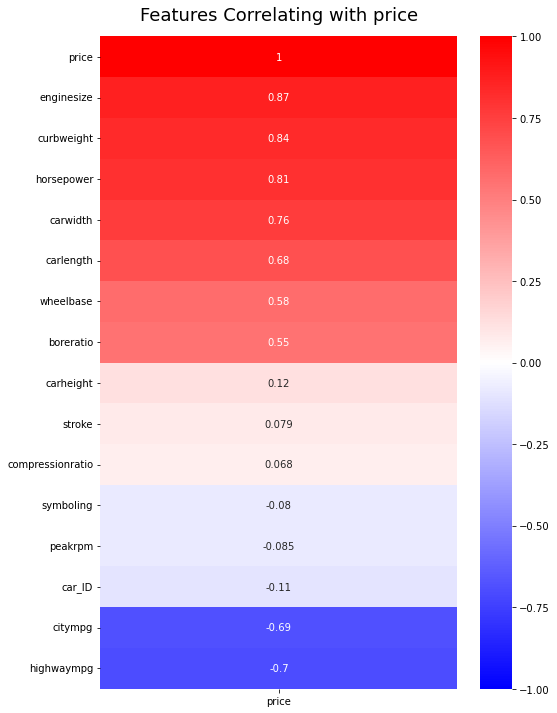

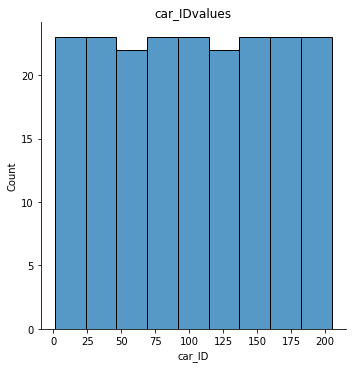

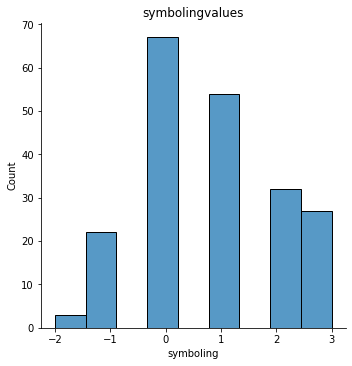

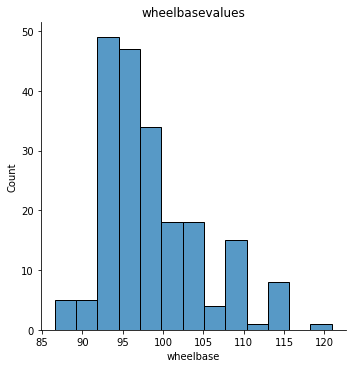

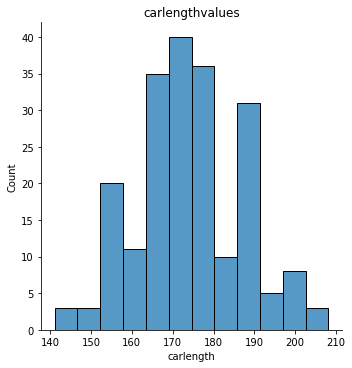

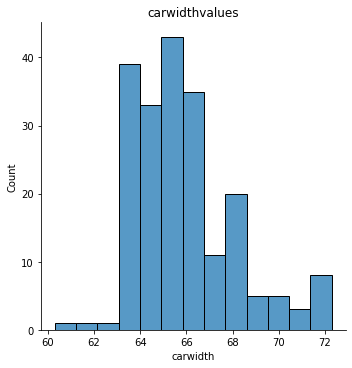

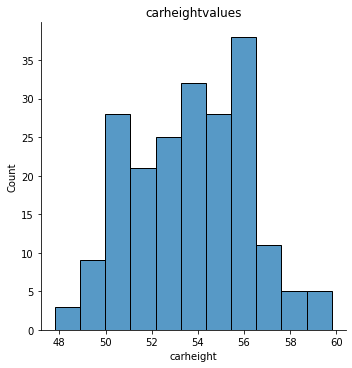

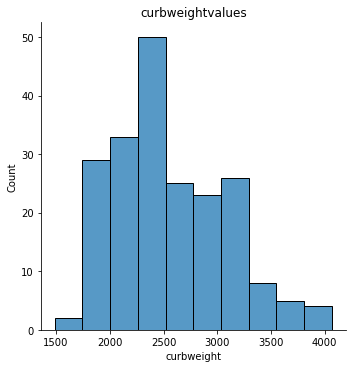

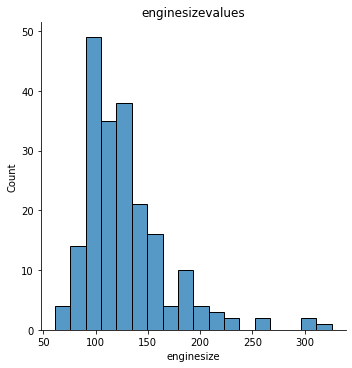

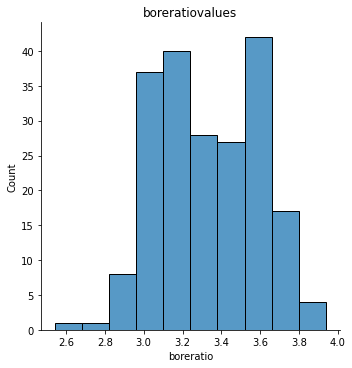

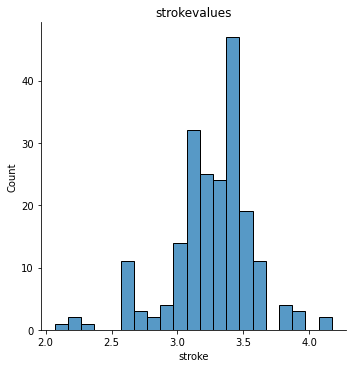

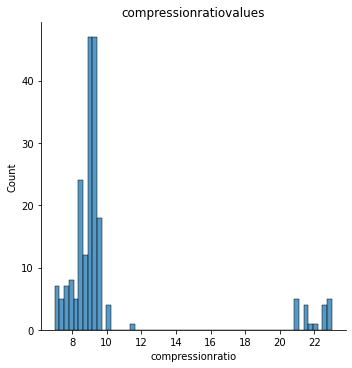

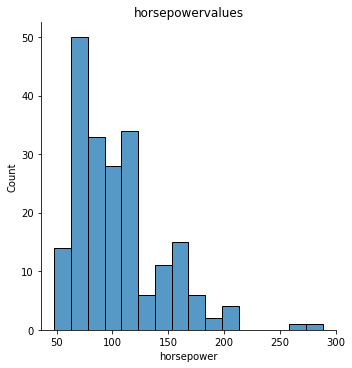

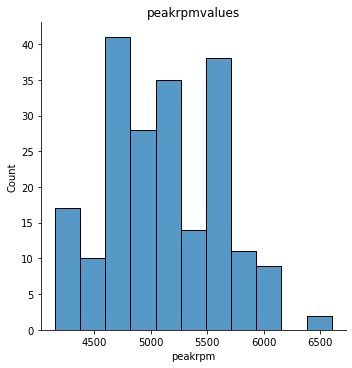

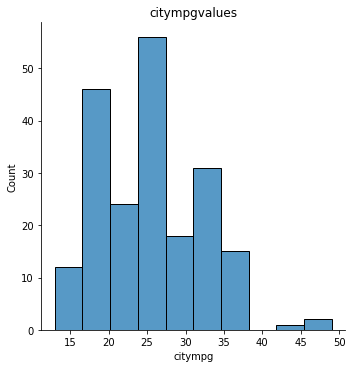

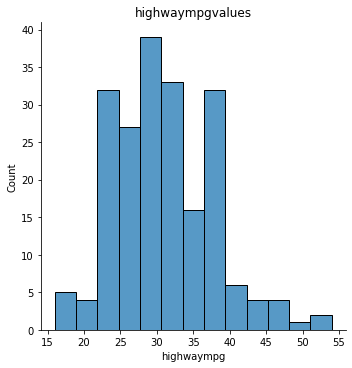

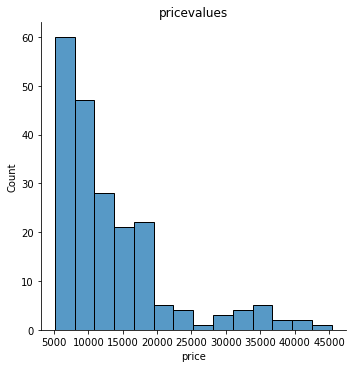

In [14]:
EDA(car_df,'price')

In [38]:
def Regression_Models(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from matplotlib import pyplot as plt 
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import RidgeCV
    from sklearn.linear_model import LassoCV
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import GridSearchCV
    import numpy as np
    
    param_grid = {"alpha": np.linspace(0.00001, 1, 20)}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    print('Linear Regression train_Score:',lr.score(X_train,y_train))
    print('Linear Regression test_Score:',lr.score(X_test,y_test))
    np.mean(cross_val_score(lr, X, y, cv=5))
    
    # Ridge Regression
    # alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
    # ridge_test_scores = []
    # ridge_train_scores = []
    # for alpha in alphas:
    #     ridge = Ridge(alpha=alpha)
    #     ridge.fit(X_train,y_train)
    #     test_score = ridge.score(X_test,y_test)
    #     train_score = ridge.score(X_train,y_train)
    #     ridge_test_scores.append(test_score)
    #     ridge_train_scores.append(train_score)
    #     print(f"ridge test scores are:{ridge_test_scores}")
    #     print(f"ridge train scores are:{ridge_train_scores}")
    
    # Lasso Regression
    lasso = LassoCV()
    lasso.fit(X_train, y_train)
    print(lr.coef_)
    print('Lasso train_Score:',lasso.score(X_train, y_train))
    print('Lasso test_Score:',lasso.score(X_test, y_test))
    
    # Decision Tree
    dt = DecisionTreeRegressor()
    dt.fit(X_train,y_train)
    print('DT train_Score:',dt.score(X_train, y_train))
    print('DT test_Score:',dt.score(X_test,y_test))
    
    # Random Forest
    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    print('RF train_Score:',rf.score(X_train, y_train))
    print('RF test_Score:',rf.score(X_test,y_test))
    
    # KNeighbors Regressor
    knn = KNeighborsRegressor()
    knn.fit(X_train,y_train)
    print('KNN train_Score:',knn.score(X_train, y_train))
    print('KNN test_Score:',knn.score(X_test, y_test))
    
    # Bagging Regressor
    br = BaggingRegressor()
    br.fit(X_train,y_train)
    print('BR train_Score:',br.score(X_train, y_train))
    print('BR test_Score:',br.score(X_test, y_test))
    
    # Ada Boost Regressor
    abr = AdaBoostRegressor()
    abr.fit(X_train,y_train)
    print('ADA train_Score:',abr.score(X_train, y_train))
    print('ADA test_Score:',abr.score(X_test, y_test))
    
    # Support Vector Regressor
    sv = SVR()
    sv.fit(X_train,y_train)
    print('SV train_Score:',sv.score(X_train, y_train))
    print('SV test_Score:',sv.score(X_test, y_test))
    
    def rmse(model, X_train, X_test, y_train, y_test):
        Z_train = sc.fit_transform(X_train)
        Z_test = sc.transform(X_test)
        model.fit(Z_train,y_train)
        rmse_train = mean_squared_error(y_true=y_train,y_pred=model.predict(X_train),
                                        squared = False)
        rmse_test = mean_squared_error(y_true=y_test,y_pred=model.predict(X_test),
                                        squared = False)
        print('rmse train score of', model , ':', rmse_train)
        print('rmse test score of', model , ':', rmse_test)
        print(rmse(lr, X_train, X_test, y_train, y_test))
        print(rmse(knn, X_train, X_test, y_train, y_test))  
        print(rmse(dt, X_train, X_test, y_train, y_test))  
        print(rmse(br, X_train, X_test, y_train, y_test))  
        print(rmse(rf, X_train, X_test, y_train, y_test))  
        print(rmse(abr, X_train, X_test, y_train, y_test))  
        print(rmse(sv, X_train, X_test, y_train, y_test))


In [39]:
Regression_Models(car_df.drop('price',axis=1),car_df['price'])

Linear Regression train_Score: 0.8559179801378098
Linear Regression test_Score: 0.8679199725267075
[-2.09391979e+01  6.02920759e+02  1.14230003e+02 -1.39784770e+01
  2.35550494e+02  3.95997488e+02  1.53868074e+00  1.03453939e+02
  4.12197526e+02 -3.83828853e+03  3.84320230e+02  4.56523737e+01
  2.29914561e+00 -3.32644112e+02  2.87125876e+02]
Lasso train_Score: 0.8125895468459651
Lasso test_Score: 0.8635017667649453
DT train_Score: 1.0
DT test_Score: 0.8922606089282065
RF train_Score: 0.9862504363604186
RF test_Score: 0.9572869864512586
KNN train_Score: 0.8556055811591153
KNN test_Score: 0.9159078307651901
BR train_Score: 0.98086735865519
BR test_Score: 0.9622700683739385
ADA train_Score: 0.9520325998347617
ADA test_Score: 0.927568890586232
SV train_Score: -0.14718129947676495
SV test_Score: -0.13851046337510575


In [40]:
car_df.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')